In [130]:
'''
Ali Rabiee 99210389
HW3
Question_5
'''
#Part(a)
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import scipy.io

#Read images
img1 = cv2.imread('img1.png',0)
img2 = cv2.imread('img2.png',0)

#Read mat files
points = scipy.io.loadmat('points.mat')
inliers = scipy.io.loadmat('points_inliers.mat')
info = scipy.io.loadmat('info.mat')

In [131]:

#Find Fundamental matrix from inliers
pts1 = np.int32(inliers['X1'])
pts2 = np.int32(inliers['X2'])
F1, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_LMEDS)

#Find epilines of image1
epilines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2, F1)
epilines1 = epilines1.reshape(-1, 3)

#Find epilines of image2
epilines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F1)
epilines2 = epilines2.reshape(-1, 3)

In [132]:
#Draw the provided lines on the image
def drawLines(img1,img2,lines,pts1,pts2):
    r, c = img1.shape[:2]
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r, pt1, pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1] ])
        x1, y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0, y0), (x1, y1), color, 8)
        img1 = cv2.circle(img1, tuple(pt1), 5, color, thickness = 30)
        img2 = cv2.circle(img2, tuple(pt2), 5, color, thickness = 30)
    return img1,img2

Fundamental matrix using points_inliers.mat :

[[ 8.79147769e-09 -1.25025302e-06  2.11189675e-03]
 [ 1.67040169e-06 -6.41336490e-08  1.93294583e-03]
 [-2.83646639e-03 -2.43781353e-03  1.00000000e+00]]



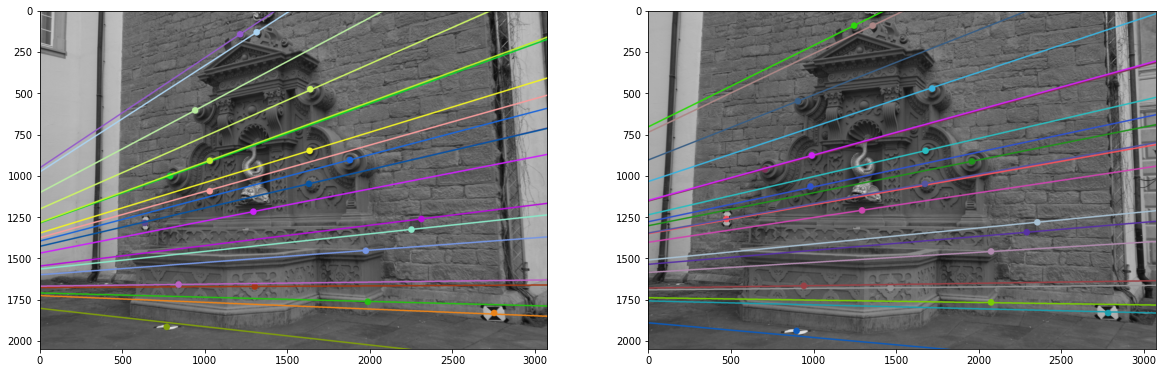

In [133]:
#Output of Part(a)
figure(figsize=(20, 20))
out1,out2 = drawLines(img2, img1, epilines2, pts2, pts1)
out3,out4 = drawLines(img1, img2, epilines1, pts1, pts2)
print('Fundamental matrix using points_inliers.mat :\n')
print(F1)
print()
plt.subplot(121), plt.imshow(out3)
plt.subplot(122), plt.imshow(out1)
plt.show()

In [134]:
#Part(b)
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import math

In [135]:
#RANSAC Algorithm
p = 0.99 #Probability
n = 8    #Number of minimal sample sets 
w = 0.5  #Estimated proportion of outliers 
N = math.ceil((math.log(1 - p))/(math.log(1 - (1 - w) ** n))) #Number of iterations
print('\n------------------------------------------')
print(f'Number of iterations are needed = {N}')
print('------------------------------------------\n')


------------------------------------------
Number of iterations are needed = 1177
------------------------------------------



In [136]:

pts1 = np.int32(points['X1'])
pts2 = np.int32(points['X2'])

#Find Fundamental matrix with RANSAC
F2, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC)

#We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

#Find epilines of image1
epilines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2, F2)
epilines1 = epilines1.reshape(-1, 3)

#Find epilines of image2
epilines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F2)
epilines2 = epilines2.reshape(-1, 3)

Fundamental matrix using points.mat :

[[-5.33469372e-09 -9.00397534e-07  1.39766911e-03]
 [ 1.32411869e-06 -2.17839853e-08  2.63545311e-03]
 [-2.06281421e-03 -3.23075197e-03  1.00000000e+00]]



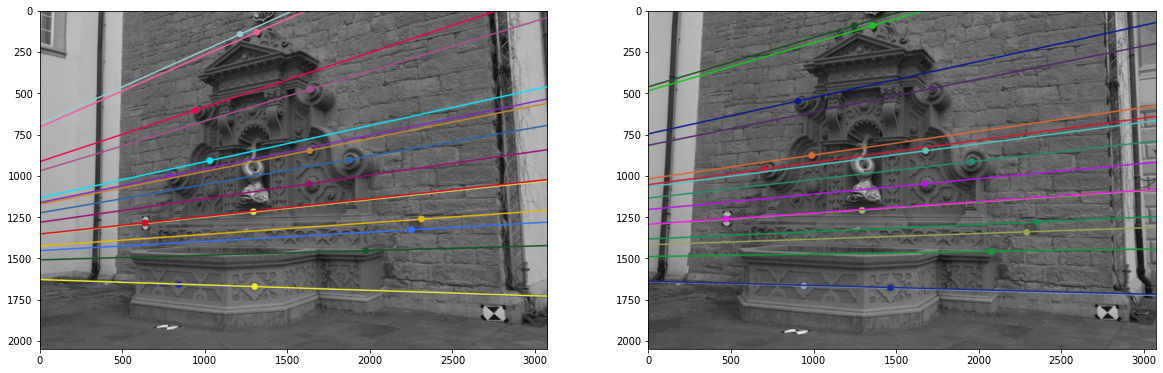

In [137]:
#Output of Part(b)
figure(figsize=(20, 20))
out1,out2 = drawLines(img2, img1, epilines2, pts2, pts1)
out3,out4 = drawLines(img1, img2, epilines1, pts1, pts2)
print('Fundamental matrix using points.mat :\n')
print(F2)
print()
plt.subplot(121),plt.imshow(out3)
plt.subplot(122),plt.imshow(out1)
plt.show()

In [138]:
#Part(c)
F_real = np.float32(info['F'])
print('Fundamental matrix using 8-point algorithm = ')
print(f'{F1}\n')
print('Fundamental matrix using RANSAC algorithm = ')
print(f'{F2}\n')
print('Real fundamental matrix = ')
print(f'{F_real}\n')
print('As we see both of fundamental metrices are close to real one :)\n')

Fundamental matrix using 8-point algorithm = 
[[ 8.79147769e-09 -1.25025302e-06  2.11189675e-03]
 [ 1.67040169e-06 -6.41336490e-08  1.93294583e-03]
 [-2.83646639e-03 -2.43781353e-03  1.00000000e+00]]

Fundamental matrix using RANSAC algorithm = 
[[-5.33469372e-09 -9.00397534e-07  1.39766911e-03]
 [ 1.32411869e-06 -2.17839853e-08  2.63545311e-03]
 [-2.06281421e-03 -3.23075197e-03  1.00000000e+00]]

Real fundamental matrix = 
[[-6.8099806e-09  1.1817389e-08 -1.0893237e-04]
 [ 3.4785288e-07 -3.4093368e-09  4.7492362e-03]
 [-4.6183186e-04 -5.3755622e-03  1.0000000e+00]]

As we see both of fundamental metrices are close to real one :)



In [139]:
#Find epilines of image1 using real fundamental matrix
epilines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2, F_real)
epilines1 = epilines1.reshape(-1, 3)

#Find epilines of image2 using real fundamental matrix
epilines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F_real)
epilines2 = epilines2.reshape(-1, 3)


Epipolar geometry using The real fundamental matrix :



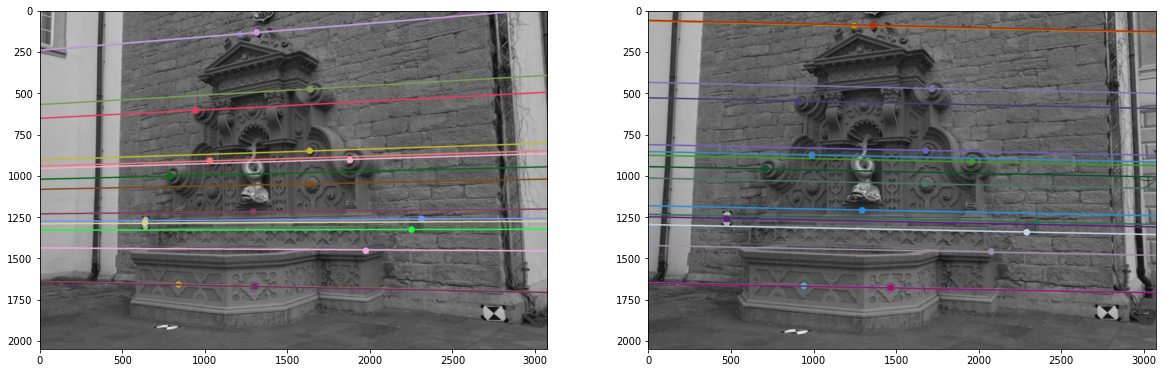

In [140]:
#Epipolar geometry using The real fundamental matrix
figure(figsize=(20, 20))
out1,out2 = drawLines(img2, img1, epilines2, pts2, pts1)
out3,out4 = drawLines(img1, img2, epilines1, pts1, pts2)
print('\nEpipolar geometry using The real fundamental matrix :\n')
plt.subplot(121), plt.imshow(out3)
plt.subplot(122), plt.imshow(out1)
plt.show()